In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/aneebaaslam/Desktop/zomato_restaurants_in_India.csv'
data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [4]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


# Data Cleaning and Preparation:

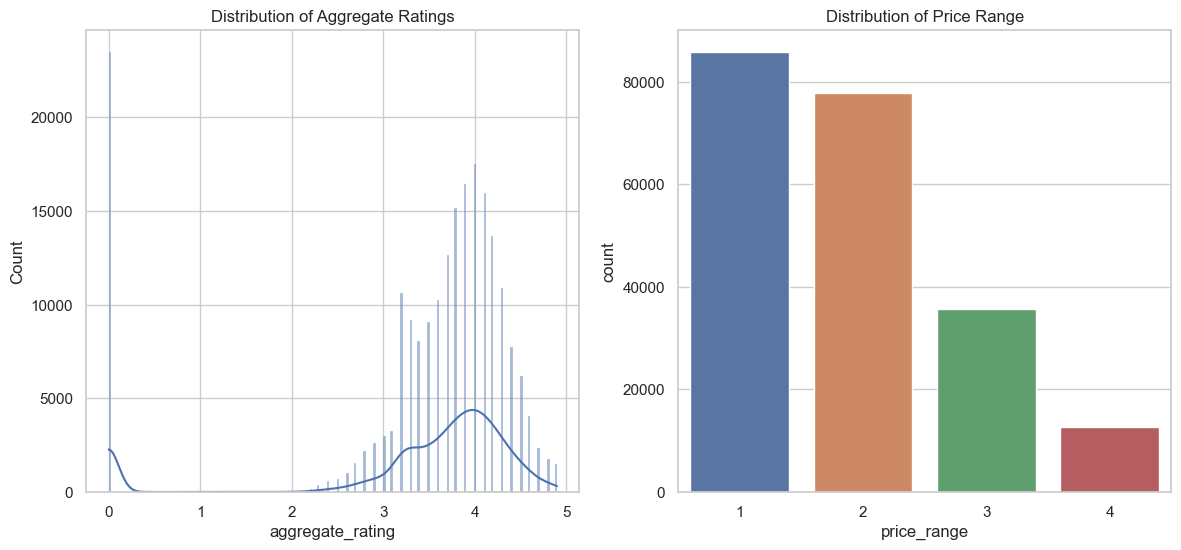

(             res_id        city_id       latitude      longitude  country_id  \
 count  2.119440e+05  211944.000000  211944.000000  211944.000000    211944.0   
 mean   1.349411e+07    4746.785434      21.499758      77.615276         1.0   
 std    7.883722e+06    5568.766386      22.781331       7.500104         0.0   
 min    5.000000e+01       1.000000       0.000000       0.000000         1.0   
 25%    3.301027e+06      11.000000      15.496071      74.877961         1.0   
 50%    1.869573e+07      34.000000      22.514494      77.425971         1.0   
 75%    1.881297e+07   11306.000000      26.841667      80.219323         1.0   
 max    1.915979e+07   11354.000000   10000.000000      91.832769         1.0   
 
        average_cost_for_two    price_range  aggregate_rating          votes  \
 count         211944.000000  211944.000000     211944.000000  211944.000000   
 mean             595.812229       1.882535          3.395937     378.001977   
 std              606.239363 

In [5]:
data['address'].fillna('Unknown', inplace=True)  
data['timings'].fillna('Not available', inplace=True)  
data['cuisines'].fillna(data['cuisines'].mode()[0], inplace=True)  


data['votes'] = data['votes'].apply(lambda x: max(x, 0))  


import ast  
data['establishment'] = data['establishment'].apply(ast.literal_eval)
data['highlights'] = data['highlights'].apply(ast.literal_eval)


data['number_of_highlights'] = data['highlights'].apply(len)


desc_stats = data.describe()


import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.histplot(data['aggregate_rating'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Aggregate Ratings')


sns.countplot(x='price_range', data=data, ax=axes[1])
axes[1].set_title('Distribution of Price Range')

plt.show()


correlation_matrix = data[['aggregate_rating', 'average_cost_for_two', 'votes', 'number_of_highlights']].corr()


desc_stats, correlation_matrix

# Exploratory Data Analysis

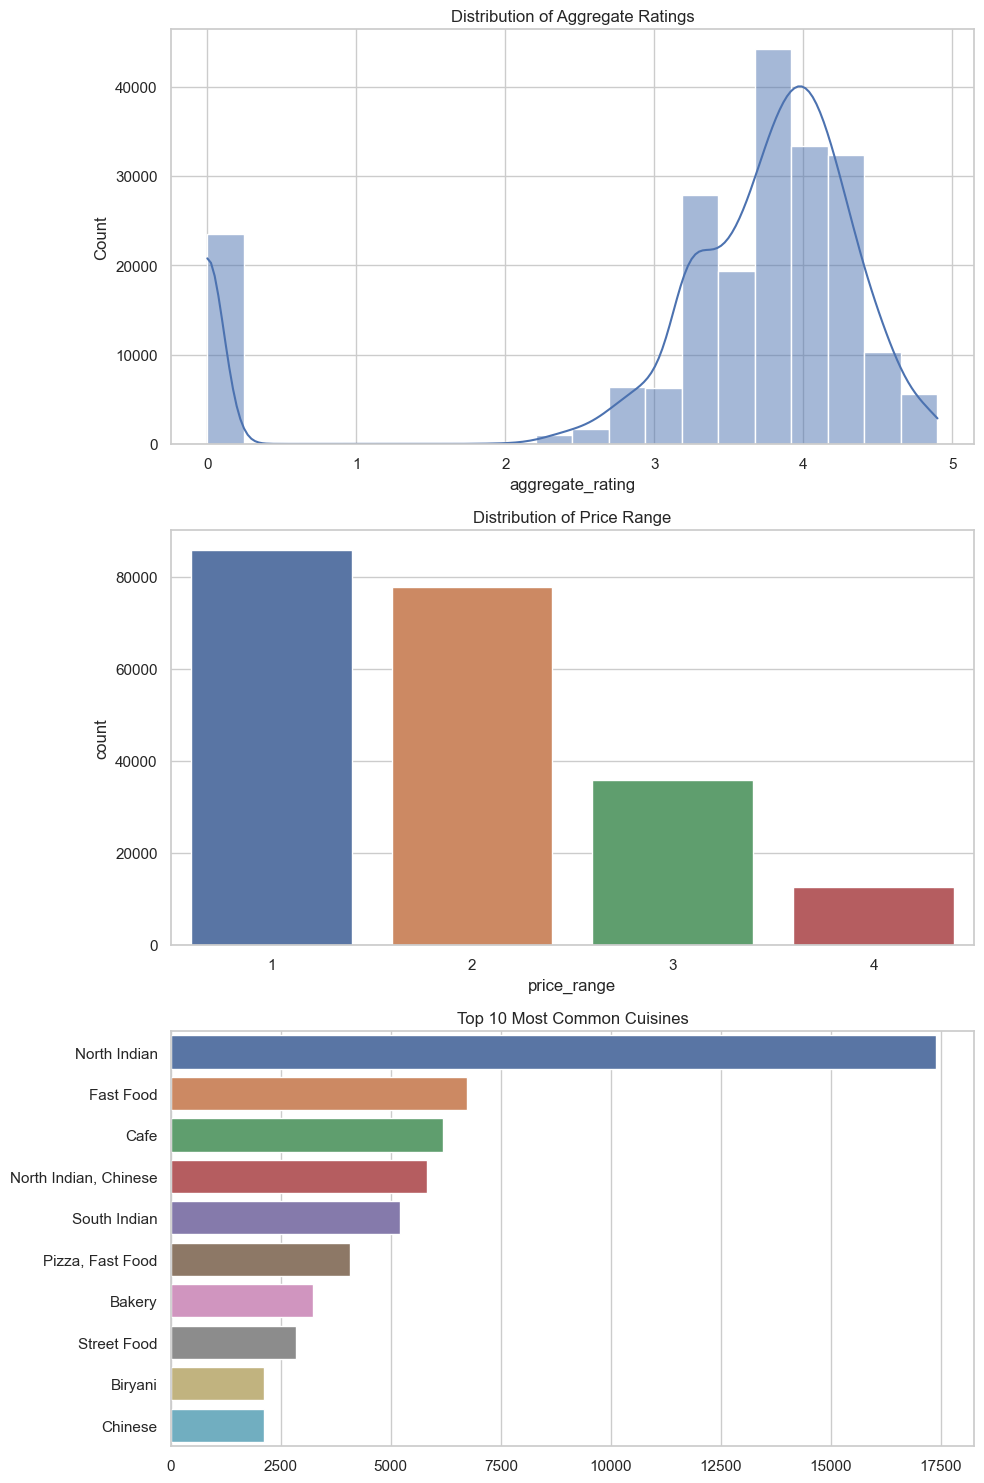

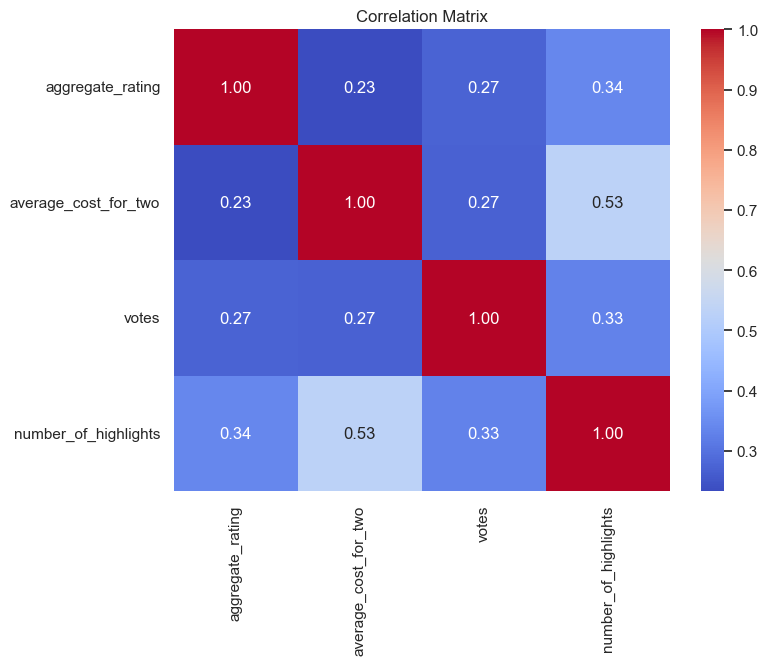

(        aggregate_rating  average_cost_for_two  number_of_highlights
 mean            3.395937            595.812229              9.362393
 median          3.800000            400.000000              9.000000,
      aggregate_rating  average_cost_for_two  number_of_highlights
 std          1.283642            606.239363              4.341937
 min          0.000000              0.000000              0.000000
 max          4.900000          30000.000000             42.000000,
       aggregate_rating  average_cost_for_two  number_of_highlights
 skew         -1.911960              5.491744              1.039694
 kurt          2.550176            112.761405              2.465179)

In [6]:
central_tendency = data[['aggregate_rating', 'average_cost_for_two', 'number_of_highlights']].agg(['mean', 'median'])


dispersion = data[['aggregate_rating', 'average_cost_for_two', 'number_of_highlights']].agg(['std', 'min', 'max'])

shape = data[['aggregate_rating', 'average_cost_for_two', 'number_of_highlights']].agg(['skew', 'kurt'])


fig, axes = plt.subplots(3, 1, figsize=(10, 15))


sns.histplot(data['aggregate_rating'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Aggregate Ratings')


sns.countplot(x='price_range', data=data, ax=axes[1])
axes[1].set_title('Distribution of Price Range')


top_cuisines = data['cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, ax=axes[2])
axes[2].set_title('Top 10 Most Common Cuisines')

plt.tight_layout()


correlation_matrix = data[['aggregate_rating', 'average_cost_for_two', 'votes', 'number_of_highlights']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()


central_tendency, dispersion, shape

# Regional Analysis

,cuisines,highlights
city,,
Agra,North Indian,"[Dinner, Takeaway Available, Lunch, Cash, Indo..."
Ahmedabad,Cafe,"[Dinner, Delivery, Debit Card, Lunch, Cash, Ta..."
Ajmer,North Indian,"[Breakfast, Dinner, Takeaway Available, Cash, ..."
Alappuzha,Kerala,"[Lunch, Cash, Breakfast, No Alcohol Available,..."
Allahabad,North Indian,"[Dinner, Delivery, Lunch, Cash, Takeaway Avail..."
Amravati,North Indian,[]
Amritsar,North Indian,"[Lunch, Delivery, Debit Card, No Alcohol Avail..."
Aurangabad,North Indian,"[Lunch, Cash, No Alcohol Available, Dinner, Ta..."
Bangalore,South Indian,"[Lunch, Cash, Takeaway Available, Debit Card, ..."


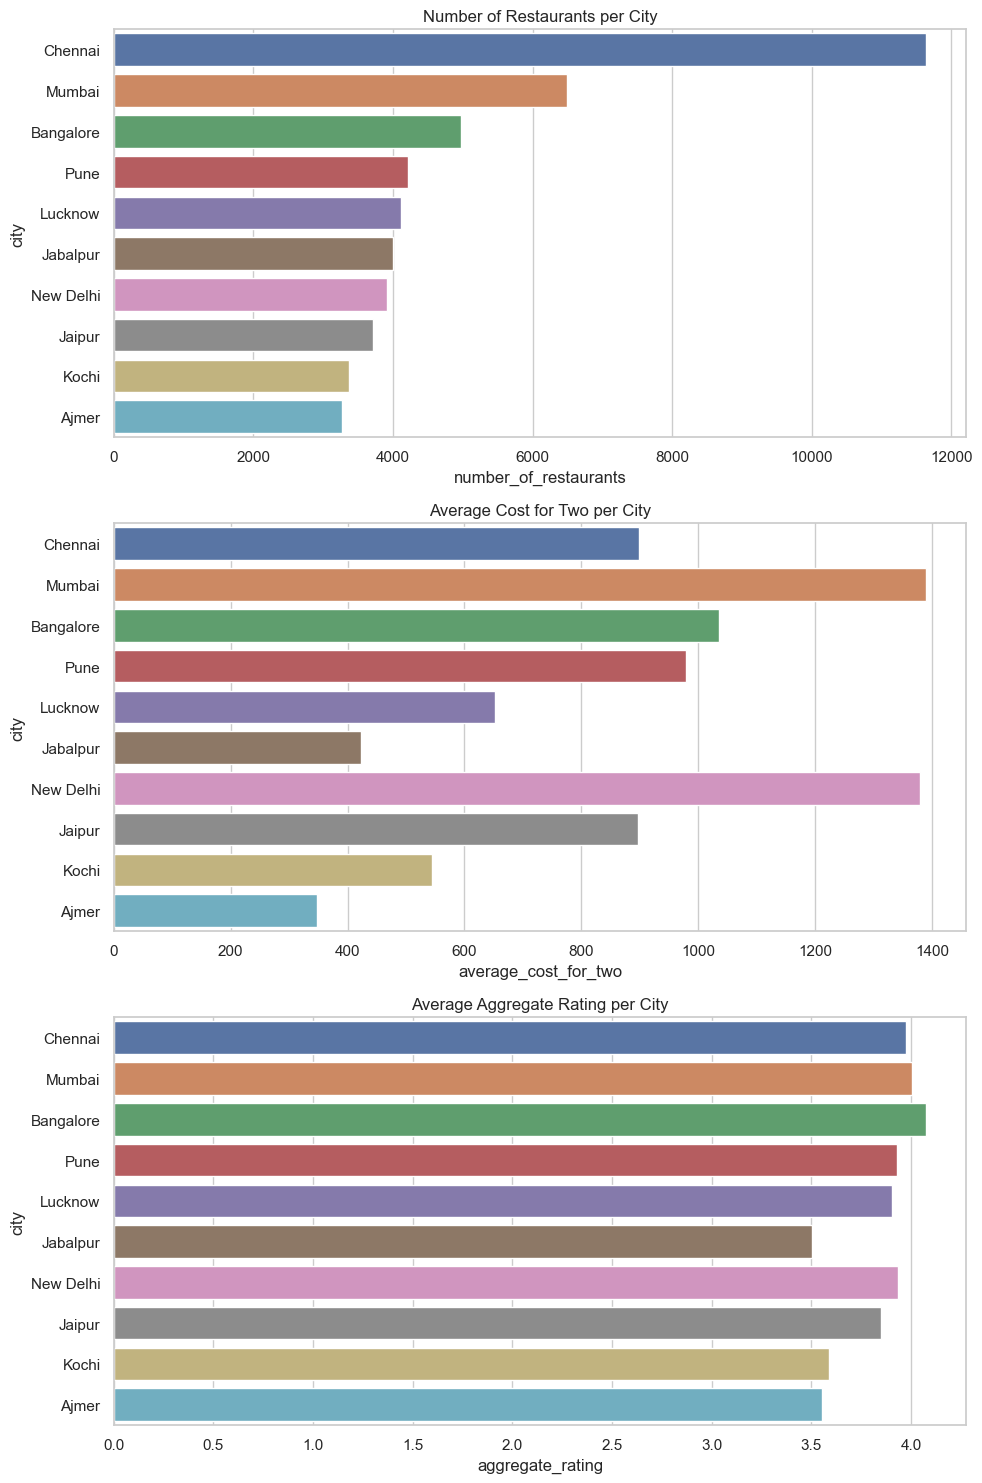

In [7]:
city_group = data.groupby('city').agg({
    'res_id': 'count',  
    'average_cost_for_two': 'mean',  
    'aggregate_rating': 'mean',  
    'number_of_highlights': 'mean'  
}).rename(columns={'res_id': 'number_of_restaurants'}).sort_values(by='number_of_restaurants', ascending=False)

# Top 10 cities by number of restaurant.
top_cities = city_group.head(10)

# Plotting the distribution of restaurants, average cost, and ratings in these cities
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Number of restaurants per city
sns.barplot(x=top_cities['number_of_restaurants'], y=top_cities.index, ax=ax[0])
ax[0].set_title('Number of Restaurants per City')

# Average cost for two per city
sns.barplot(x=top_cities['average_cost_for_two'], y=top_cities.index, ax=ax[1])
ax[1].set_title('Average Cost for Two per City')

# Average rating per city
sns.barplot(x=top_cities['aggregate_rating'], y=top_cities.index, ax=ax[2])
ax[2].set_title('Average Aggregate Rating per City')

plt.tight_layout()

# Unique characteristics per city: using mode of cuisines and highlights
city_characteristics = data.groupby('city').agg({
    'cuisines': lambda x: pd.Series.mode(x)[0],  
    'highlights': lambda x: pd.Series.mode(x)[0]  
})

city_characteristics.head(10)

# Customer Preference Analysis:

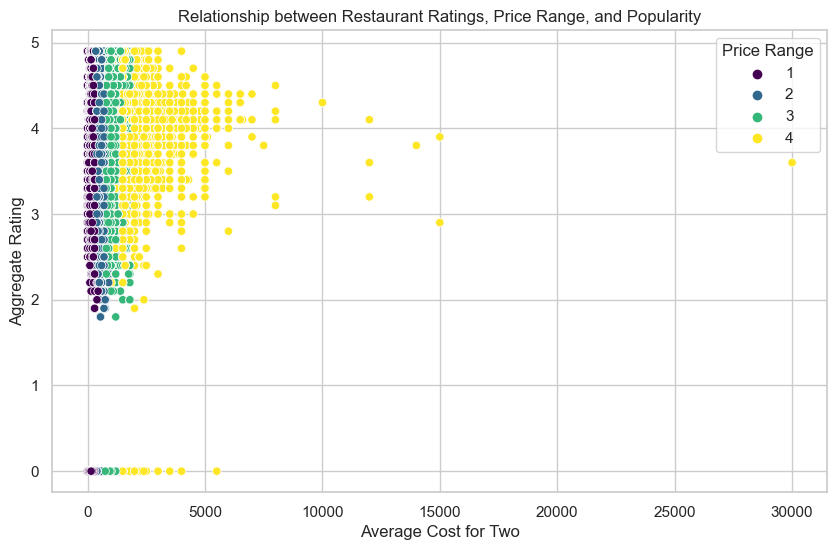

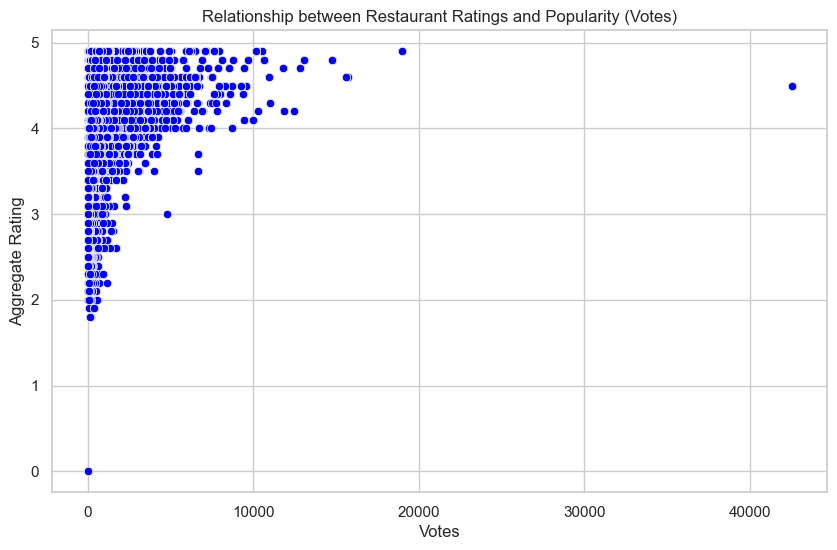

                      aggregate_rating  average_cost_for_two     votes
aggregate_rating              1.000000              0.232347  0.271953
average_cost_for_two          0.232347              1.000000  0.269050
votes                         0.271953              0.269050  1.000000
                city      cuisines  count
city                                     
Agra            Agra  North Indian    340
Ahmedabad  Ahmedabad          Cafe    190
Ajmer          Ajmer  North Indian    599
Alappuzha  Alappuzha        Kerala    251
Allahabad  Allahabad  North Indian    316


In [8]:
# Analyzing types of cuisines that are popular in different regions
city_cuisine_counts = data.groupby(['city', 'cuisines']).size().reset_index(name='count')
most_popular_cuisine_per_city = city_cuisine_counts.groupby('city').apply(lambda x: x.loc[x['count'].idxmax()])

# Examine the relationship between restaurant ratings, price range, and popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_cost_for_two', y='aggregate_rating', hue='price_range', data=data, palette='viridis')
plt.title('Relationship between Restaurant Ratings, Price Range, and Popularity')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.legend(title='Price Range')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='aggregate_rating', data=data, color='blue')
plt.title('Relationship between Restaurant Ratings and Popularity (Votes)')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

# Correlation Analysis
correlation_matrix = data[['aggregate_rating', 'average_cost_for_two', 'votes']].corr()
print(correlation_matrix)

# Display the most popular cuisine per city
print(most_popular_cuisine_per_city.head())

# Competitive Analysis:

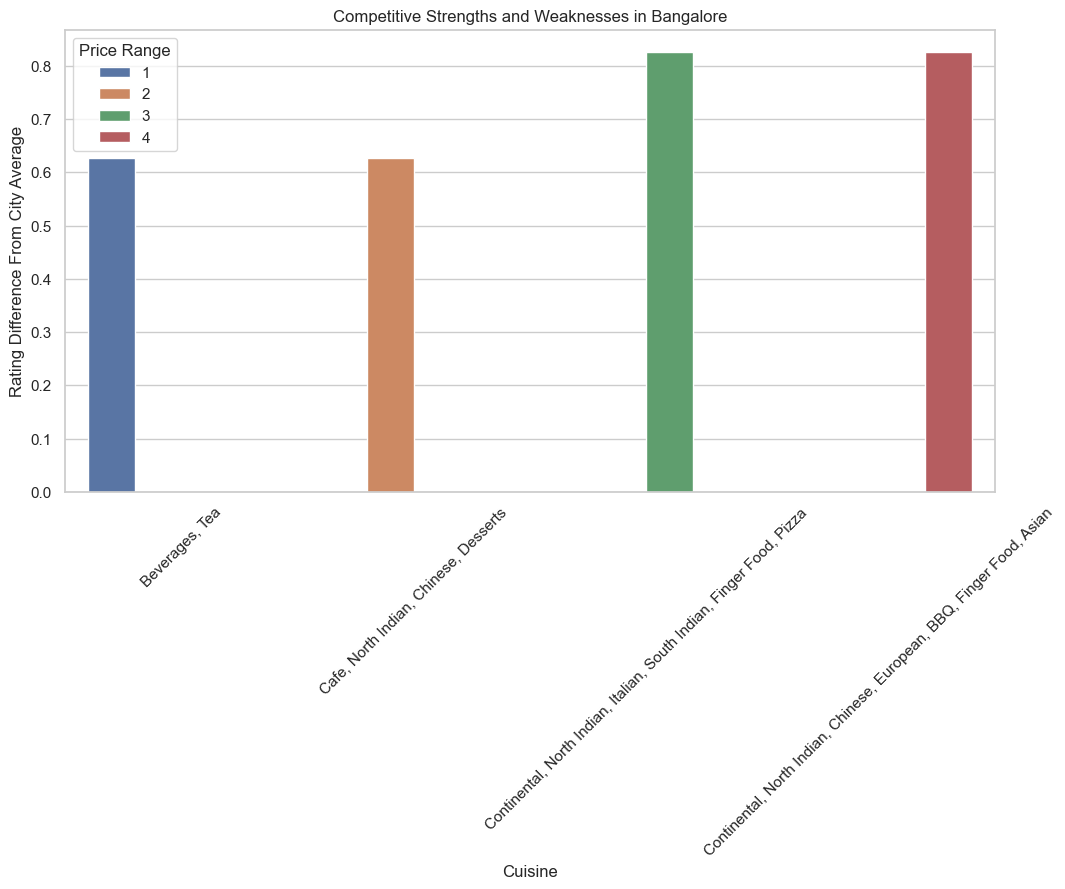

In [9]:
# Grouping data by city, cuisine, and price range to get an average rating for each group
competitive_groups = data.groupby(['city', 'cuisines', 'price_range']).agg({
    'aggregate_rating': 'mean',
    'votes': 'sum'  # Sum of votes to gauge popularity
}).reset_index()

# Identifying the top competitors in each city by highest average rating and most votes within each price range
top_competitors_per_city = competitive_groups.groupby(['city', 'price_range']).apply(
    lambda x: x.nlargest(1, ['aggregate_rating', 'votes'])
).reset_index(drop=True)

# Calculate average metrics for each city (for comparison)
average_metrics_city = data.groupby('city').agg({
    'aggregate_rating': 'mean',
    'average_cost_for_two': 'mean',
    'votes': 'mean'
}).reset_index()

# Merge top competitors with city averages to analyze strengths and weaknesses
competitive_analysis = pd.merge(top_competitors_per_city, average_metrics_city, on='city', suffixes=('_comp', '_avg'))

# Calculate differences to identify strengths and weaknesses
competitive_analysis['rating_diff'] = competitive_analysis['aggregate_rating_comp'] - competitive_analysis['aggregate_rating_avg']
competitive_analysis['votes_diff'] = competitive_analysis['votes_comp'] - competitive_analysis['votes_avg']

# Visualizing the top competitors in a sample city for illustration
sample_city_data = competitive_analysis[competitive_analysis['city'] == 'Bangalore']
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisines', y='rating_diff', hue='price_range', data=sample_city_data)
plt.title('Competitive Strengths and Weaknesses in Bangalore')
plt.xlabel('Cuisine')
plt.ylabel('Rating Difference From City Average')
plt.legend(title='Price Range')
plt.xticks(rotation=45)
plt.show()

# Market Gap Analysis:

In [ ]:
# Count of cuisines by city to find underrepresented cuisines
cuisine_distribution = data.groupby(['city', 'cuisines']).size().reset_index(name='count')
city_cuisine_totals = cuisine_distribution.groupby('city')['count'].sum().reset_index(name='total_cuisines')
cuisine_market_share = pd.merge(cuisine_distribution, city_cuisine_totals, on='city')
cuisine_market_share['market_share'] = cuisine_market_share['count'] / cuisine_market_share['total_cuisines']

# Finding cities with the lowest market share for popular cuisines
# This indicates potential gaps where these cuisines are underrepresented
potential_gaps = cuisine_market_share[cuisine_market_share['market_share'] < 0.01]  # Threshold for underrepresentation

# Analyzing price ranges across different cities to find underrepresented price ranges
price_range_distribution = data.groupby(['city', 'price_range']).size().reset_index(name='count')
city_price_totals = price_range_distribution.groupby('city')['count'].sum().reset_index(name='total_price_counts')
price_market_share = pd.merge(price_range_distribution, city_price_totals, on='city')
price_market_share['market_share'] = price_market_share['count'] / price_market_share['total_price_counts']

# Finding cities with the lowest market share for certain price ranges
# This identifies price ranges that might be underexploited
underrepresented_prices = price_market_share[price_market_share['market_share'] < 0.05]  # Threshold for underrepresentation

# Visualizing the findings for potential market gaps
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisines', y='market_share', hue='city', data=potential_gaps)
plt.title('Underrepresented Cuisines by City')
plt.xlabel('Cuisine')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='price_range', y='market_share', hue='city', data=underrepresented_prices)
plt.title('Underrepresented Price Ranges by City')
plt.xlabel('Price Range')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.tight_layout()
plt.show()